<h1 style="color:rgb(0,120,170)">Logistic Regression from Scratch</h1>

- Create dataset as csv file
- Code of logistic gradient, cost function, numerical gradient, comparison
- import file
- run functions
- plots of training & test sets
- confusion matrix
- evt. AUC & ROC

In [1]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
import matplotlib
import matplotlib.pyplot as plt
from IPython.utils import io
from sklearn.datasets import make_classification

RSEED = 101

In [2]:
# create data matrix with n datapoints, d features
# create label vector y with randomly generated values
# create weight matrix w with randomly generated values
np.random.seed(RSEED)
n = 10
d = 4
X_random = np.random.normal(size=(n, d)).T
y_random = np.random.randint(0, 2, size=(n,1))
w_random = np.random.normal(size=(d))


In [3]:
#dataset = np.hstack((X_random, y_random))
# np.savetxt('MY_EXAMPLE.csv', dataset, delimiter=',')

In [4]:
print(X_random.shape)

(4, 10)


The first function is just the sigmoid function which will be used several times later.

The second function `logistic_gradient(w, x, y)` has a parameter vector $\mathbf{w}$, a data matrix $\mathbf{X}$ and a label vector $\mathbf{y}$ as input and the gradient $\frac{\partial L}{\partial
\mathbf{w}}$ is the output, where $L$ is the negative log-likelihood for the Bernoulli distribution, i.e. the cross-entropy loss

In [5]:

def calc_sigmoid(x):
    return 1 / (1 + np.exp(-x))


"""
Function that computes the logistic gradient.
inputs:weights w, data matrix X, label vector y
output:computed logistic gradient( array)
"""
def logistic_gradient(w, x, y):  
    
    gradient = np.zeros(shape=len(w)) #z is a linear function z = W.T *x_i
    
    for i in range(len(y)):
        z = (w.T)@x[:,i]

        sigmoid = calc_sigmoid(z)
        # gradient array = (sigma_i-y)*x_i
        gradient += (sigmoid-y[i])*x[:,i]
    return gradient
#gradient += (sigmoid-y[i])*x[:,i]

In [6]:
""" The next function should compute the cross-entropy loss.
The inputs are the same as the first, the output is the cross-entropy loss(float value)

"""
def cost(w, x, y):
    costs = 0
    for i in range(0, len(y)):    
    #z = np.transpose(w) * x[i,:]
        z = (w.T)@x[:,i]
        model = calc_sigmoid(z)
    # add cost of points with label 1
        #print(f"y: {y[i]}")
        if y[i] == 1:
            costs += (-1)* np.log(model)
    # add cost of points with label 0 
        elif y[i] == 0:
            costs += (-1)* np.log(1-model)
 
    return costs

To check if the function logistic_gradient works, it is tested via Gradient Checking. To do so, another function numerical_gradiend is implemented. It calculates the gradient numerically via the central difference quotient, using $\epsilon = 10^{-4}$ and then compared with the logistic gradient.

The inputs for the function are the same(weights w, data matrix x, label vector y)
Output: computed numerical gradient(array)

In [7]:

def numerical_gradient(w, x, y):
    #raise NotImplementedError("You have not implemented this function")
    # calculates the gradient numerically via the central difference quotient, using
    # epsilon=10^−4  as suggested in the lecture slides.
    epsilon =  10**(-4)
    dw = []

    e_vector = np.zeros(shape = len(w))
    for i in range(0, len(w)):
        e_vector[i] = epsilon
        e_vector = np.transpose(e_vector)
        
        # (L(.;W+ epsilon*e) − L(.;W−epsilon*eij)) / (2 epsilon)
        loss1 = cost(w + e_vector,x ,y)
        loss2 = cost(w - e_vector,x ,y)
        
        diff_quotient = (loss1-loss2)/(2*epsilon)
        
        dw.append(diff_quotient)
        
        e_vector[i] = 0
        #dw = dw/10 
    dw = np.array(dw)
    return dw

In [8]:
# A comparison function to see if the two gradients differ a lot from each other

def comparison(a,b):
    # comparison(a,b) which checks whether the inputs  𝑎  and  𝑏 
    # don't deviate more than 1e-09 from each other
    # absolute(a - b) <= (atol + rtol * absolute(b))
    comp = np.allclose(a, b, rtol=0, atol =1e-08,)
    return comp

In [9]:
# Now th gradients are computed and compared on our small dataset

print("X =",X_random,"\n")
# print("y =",y_random,"\n")
print("w = ",w_random,"\n")
print("Logistic gradient:\n",logistic_gradient(w_random,X_random,y_random),"\n")
print("Numerical gradient:\n",numerical_gradient(w_random,X_random,y_random),"\n")
print("Difference smaller than 1e-09: ",comparison(logistic_gradient(w_random,X_random,y_random),numerical_gradient(w_random,X_random,y_random)))

X = [[ 2.70684984  0.65111795 -2.01816824  0.18869531  0.19079432  0.30266545
  -0.13484072  0.80770591 -0.49710402 -0.11677332]
 [ 0.62813271 -0.31931804  0.74012206 -0.75887206  1.97875732  1.69372293
   0.39052784  0.07295968 -0.7540697   1.9017548 ]
 [ 0.90796945 -0.84807698  0.52881349 -0.93323722  2.60596728 -1.70608593
   0.16690464  0.63878701 -0.9434064   0.23812696]
 [ 0.50382575  0.60596535 -0.58900053  0.95505651  0.68350889 -1.15911942
   0.18450186  0.3296463   0.48475165  1.99665229]] 

w =  [-0.2299375  -1.28359884 -2.71119174 -1.52241044] 

Logistic gradient:
 [-1.15747131 -4.1782395  -3.22774326 -2.49369429] 

Numerical gradient:
 [-1.15747131 -4.1782395  -3.22774326 -2.49369429] 

Difference smaller than 1e-09:  True


The next functtion`fitLogRegModel(x_train, y_train, eta=1e-4, max_iter=1e5)` uses Logistic Regression with Gradient Descent to train classifiers on the training set. The inital weights are randomly chosen. The learning rate is set to $10^{-4}$ and the maximum number of iterations is $1e5$(= 100 000). The function stops when the difference between the loss of the last iteration step and the current loss is less than $\eta$.
The function returns the model weights(np.array) and the number of iterations used while training.

In [10]:
"""
Function trains a Logistic Regression Model with Gradient Descent.
Input: x_train, y_train, eta(learning rate), max_iter, seed for random initialization of the weights
Output: weights(array), number of iterations(int)
"""
def fitLogRegModel(x_train, y_train, eta=1e-4, max_iter=100000,seed=RSEED):
    # w0 = initial guess for w
    #w_n+1 = w_n + eta * dL/dW
    
    np.random.seed(seed)
    w_zero = np.random.uniform(low=-1, high=1, size= x_train.shape[0])
    cost_zero = cost(w_zero, x_train, y_train)
    
    iterations = 0
    while iterations < max_iter:
        iterations +=1 
        #dL/dW
        #cost_zero = cost(w_zero, x_train, y_train)
        gradient_zero = logistic_gradient(w_zero, x_train, y_train)
        
        w_new = w_zero - (eta * gradient_zero)
        #gradient_new = logistic_gradient(w_new, x_train, y_train)
        cost_new = cost(w_new, x_train, y_train)
        if iterations % 1000 == 0:
            print(f"Loss at iteration {iterations}: {cost_new}")
        w_zero = w_new
        
        if np.absolute(cost_zero-cost_new) < eta:
            break
        cost_zero = cost_new
    
    w = w_new
    
    return w,iterations

The last function`predictLogReg(w, x)` returns the prediction for the a parameter vector $\mathbf{w}$ and feature vector $\mathbf{x}$ (np.array)

In [11]:
"""
Input: weights, data matrix
output: predictions(array)
"""
def predictLogReg(w, x):
    #np.random.seed(RSEED)
    x = x.T
    predictions=[]
    for i in range(x.shape[0]):
        z = np.dot(np.transpose(w), x[i,:])
        prediction = calc_sigmoid(z)
       #print(prediction)
        predictions.append(prediction)
    pred = np.array(predictions)
    return pred

Next, a larger dataset is loaded and split into training and test set( 0.5). I am aware that a 0.5 split is not used normally in machine learning, here it is just used to have a nicer graphical representation at the end)
It can be adjusted to any other split like 0.2/0.8, etc.

Alternatively, a new dataset could be created with make_classification


In [12]:
# X, y = make_classification(n_samples=500, n_features=3, n_redundant=0, n_informative=2,
#                              n_clusters_per_class=2,flip_y= 0.1, random_state=42)

# y = y[:,np.newaxis]

/tmp/ipykernel_36559/4125270327.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train=X[:np.int(X.shape[0]/2)]
/tmp/ipykernel_36559/4125270327.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20;

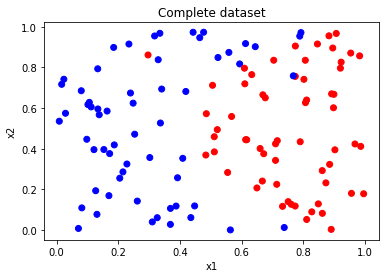

In [13]:
# Read data, split into X(features) and y(labels)

Z = np.genfromtxt('DataSet_LR_a.csv', delimiter=',',skip_header=1)
X, y = Z[:,:-1], Z[:,-1]
X = np.hstack((np.ones((X.shape[0],1)),X))   #prepend ones for intercept

# Plot data distribution
color= ['red' if elem==1 else 'blue' for elem in y ]
plt.scatter(X[:,1], X[:,2], c=color)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Complete dataset')
# Split into test and training set
X_train=X[:np.int(X.shape[0]/2)]
X_test=X[np.int(X.shape[0]/2):]
y_train=y[:np.int(len(y)/2)]
y_test=y[np.int(len(y)/2):]


In [14]:
# now the optimal weights are computed via Logistic Regression & gradient descent
weights,n_iterations = fitLogRegModel(X_train.T,y_train)
print(f'The learnt weights are: w ={weights} at iteration {n_iterations}')

Loss at iteration 1000: 35.447820681270656
Loss at iteration 2000: 33.16546926191789
Loss at iteration 3000: 31.315624468533656
Loss at iteration 4000: 29.7735336955794
Loss at iteration 5000: 28.47651491326164
Loss at iteration 6000: 27.376443126965757
Loss at iteration 7000: 26.435980868194743
Loss at iteration 8000: 25.625987787362334
Loss at iteration 9000: 24.92355169957018
Loss at iteration 10000: 24.310510177639397
Loss at iteration 11000: 23.772345046839746
Loss at iteration 12000: 23.29735463920743
Loss at iteration 13000: 22.876031267924144
Loss at iteration 14000: 22.500590127504847
Loss at iteration 15000: 22.16461022240179
Loss at iteration 16000: 21.862758589868623
Loss at iteration 17000: 21.590576844996793
Loss at iteration 18000: 21.344314685589328
Loss at iteration 19000: 21.12079904339219
Loss at iteration 20000: 20.91733049684731
Loss at iteration 21000: 20.731600688045383
Loss at iteration 22000: 20.561626040759823
Loss at iteration 23000: 20.40569421905156
Loss at

In [15]:
# now the predictLogReg is used with the learnt on the training and test set
prediction_train = predictLogReg(weights,X_train.T)
prediction_test = predictLogReg(weights,X_test.T)

Next, the training and test set are plotted and their predictions as well.

<Figure size 432x288 with 0 Axes>

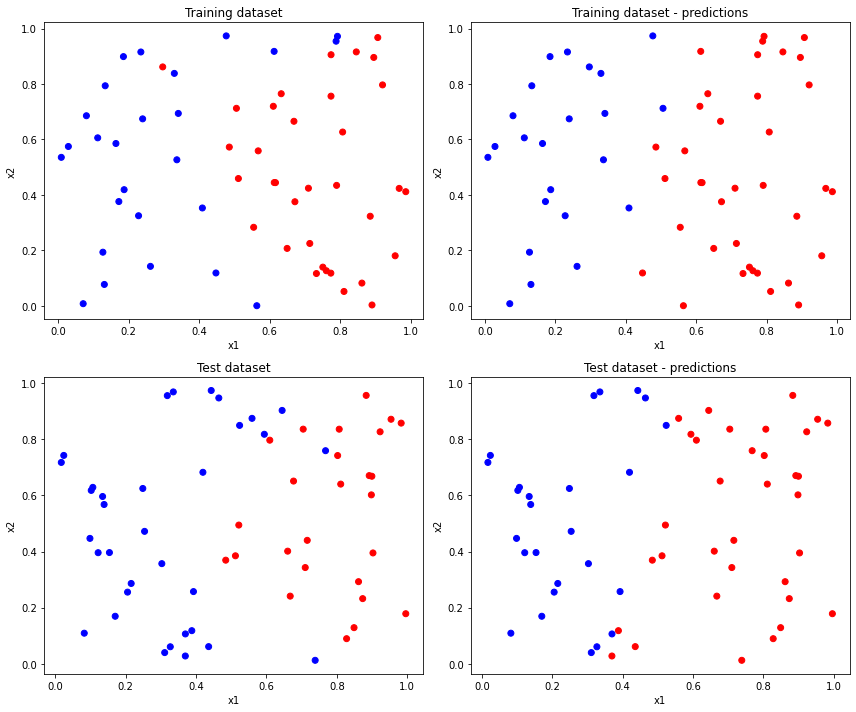

In [16]:

fig = plt.figure()
fig = plt.figure(figsize = (12,10))
plt.subplot(2, 2, 1)
color= ['red' if elem>0.5 else 'blue' for elem in y_train ]
plt.scatter(X_train[:,1], X_train[:,2], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training dataset')

plt.subplot(2, 2, 2)
color= ['red' if elem>0.5 else 'blue' for elem in prediction_train ]
plt.scatter(X_train[:,1], X_train[:,2], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training dataset - predictions')

plt.subplot(2, 2, 3)
color= ['red' if elem>0.5 else 'blue' for elem in y_test ]
plt.scatter(X_test[:,1], X_test[:,2], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Test dataset')

plt.subplot(2, 2, 4)
color= ['red' if elem>0.5 else 'blue' for elem in prediction_test ]
plt.scatter(X_test[:,1], X_test[:,2], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Test dataset - predictions')

fig.tight_layout()

In the last part, the confusion matrix, accuracy and the balanced accuracy is computed.

In [17]:
"""
Function that computes the predictions for Logistic regression.
Input: predictions, true_labels

Output: positives, negatives, true positives, true negatives, false positives, false negatives,
accuracy, balanced, accuracy
"""
def confusion_matrix_acc(predictions,true_labels,threshold=0.5):
    #replace prediction values with 1 and 0
    predictions[predictions >= threshold] = 1
    predictions[predictions < threshold] = 0
    
    pos = len(true_labels[true_labels == 1])
    neg = len(true_labels[true_labels == 0])
    
    tp = np.sum((np.int64(predictions> threshold)== true_labels)* true_labels)
    tn = np.sum((np.int64(predictions> threshold)== true_labels)* (1-true_labels))
    
    fp = np.sum((np.int64(predictions> threshold)!= true_labels)* (1-true_labels))
    fn = np.sum((np.int64(predictions> threshold)!= true_labels)* true_labels)
    
    
#     tp = np.sum(np.logical_and(predictions == 1, true_labels == 1))
#     tn = np.sum(np.logical_and(predictions== 0, true_labels == 0))
     
#     fp = np.sum(np.logical_and(predictions== 1, true_labels == 0))
#     fn = np.sum(np.logical_and(predictions== 0, true_labels == 1))
    
    acc = (tp + tn)/(pos + neg)
    tpr = tp / pos
    #print(tpr)
    if neg == 0:
        tnr = 0
    else:
        tnr = tn / neg
    # bacc = (TPR+TNR)/2
    balanced_acc = (tpr+tnr)/2
    return (pos,neg,tp,tn,fp,fn,acc,balanced_acc)

In [18]:
pos_train,neg_train,tp_train,tn_train,fp_train,fn_train,acc_train,balanced_acc_train=confusion_matrix_acc(prediction_train,y_train)
print("Traininig set:\n")
print("Positive samples: {}\nNegative samples: {}\nTrue positives: {}\nTrue negatives: {}\nFalse positives: {}\nFalse negatives: {}\nAccuracy: {}\nBalanced accuray: {}\n".format(pos_train,neg_train,tp_train,tn_train,fp_train,fn_train,acc_train,balanced_acc_train))
pos_test,neg_test,tp_test,tn_test,fp_test,fn_test,acc_test,balanced_acc_test=confusion_matrix_acc(prediction_test,y_test)
print("Test set:\n")
print("Positive samples: {}\nNegative samples: {}\nTrue positives: {}\nTrue negatives: {}\nFalse positives: {}\nFalse negatives: {}\nAccuracy: {}\nBalanced accuray: {}".format(pos_test,neg_test,tp_test,tn_test,fp_test,fn_test,acc_test,balanced_acc_test))

Traininig set:

Positive samples: 34
Negative samples: 26
True positives: 32.0
True negatives: 21.0
False positives: 5.0
False negatives: 2.0
Accuracy: 0.8833333333333333
Balanced accuray: 0.8744343891402715

Test set:

Positive samples: 26
Negative samples: 34
True positives: 26.0
True negatives: 26.0
False positives: 8.0
False negatives: 0.0
Accuracy: 0.8666666666666667
Balanced accuray: 0.8823529411764706
